# Stock Market Data Project

### We'll be answering the following questions along the way:

#### 1. What was the change in price of the stock over time?
#### 2. What was the daily return of the stock on average?
#### 3. What was the moving average of the various stocks?
#### 4. What was the correlation between different stocks' closing prices?
#### 4. What was the correlation between different stocks' daily returns?
#### 5. How much value do we put at risk by investing in a particular stock?
#### 6. How can we attempt to predict future stock behavior?

In [61]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from pandas_datareader import data,wb
from pandas_datareader.data import DataReader

from datetime import datetime

In [62]:
comp_list=['AAPL','GOOG','AMZN','MSFT']

#I am going to set the start and end date of my dataset by...

end= datetime.now()
start= datetime(end.year-1,end.month,end.day)

for stock in comp_list:
    globals()[stock]= DataReader(stock,'yahoo',start,end)
    

In [63]:
#AAPL=round(AAPL,2)

AAPL.head()
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,248.735315,243.128347,245.580118,246.152756,3.352553e+07,245.215164
std,43.563968,42.347848,42.789021,43.176151,1.718374e+07,43.700473
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,207.200001,203.632500,205.807495,205.670002,2.186125e+07,204.471893
50%,248.945000,239.809998,244.634995,244.180000,2.845690e+07,243.527946
75%,283.940002,277.967491,279.949997,280.312500,3.803428e+07,279.648819
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [64]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-05-07 to 2020-05-07
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


In [65]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-07,1190.439941,1161.040039,1180.469971,1174.099976,1551400,1174.099976
2019-05-08,1180.423950,1165.739990,1172.010010,1166.270020,1309300,1166.270020
2019-05-09,1169.660034,1150.849976,1159.030029,1162.380005,1185700,1162.380005
2019-05-10,1172.599976,1142.500000,1163.589966,1164.270020,1314500,1164.270020
2019-05-13,1147.939941,1122.109985,1141.959961,1132.030029,1860600,1132.030029


#### 1. What was the change in price of the stock over time?

Let's go ahead and plot out the volume and closing price of the stocks.
The stock price in increasing in V-shape. The graph has shown a deep bend at the beginning of the year 2020. It could happend because of COVID-19 crisis but as the world is loosing the lockdown again an increase in stock price can be observe. 

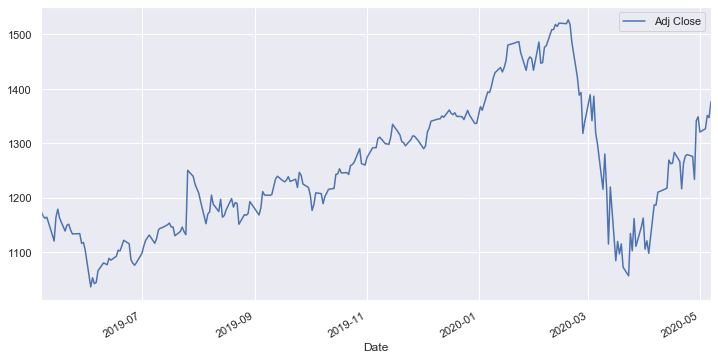

In [66]:
GOOG['Adj Close'].plot(legend=True, figsize=(12,6),grid=True)

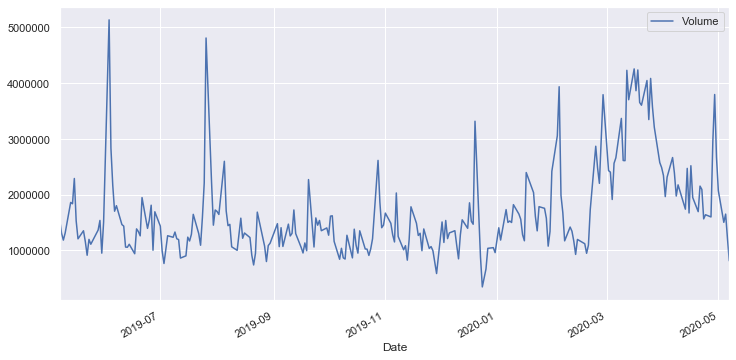

In [67]:
GOOG['Volume'].plot(legend=True,figsize=(12,6),grid=True)

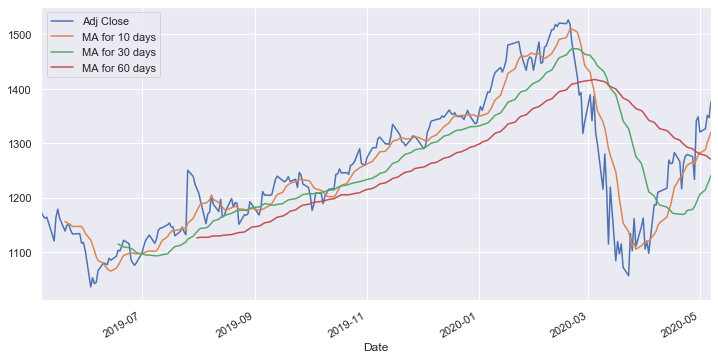

In [68]:
#Calculations of different moving averages for average price
ma_avg=[10,30,60]

#now I am going to use rolling method to calculate moving averages of ma_avg. 

for ma in ma_avg:
    column_name= 'MA for %s days' % (str(ma))
    GOOG[column_name]=GOOG['Adj Close'].rolling(ma).mean()
    
GOOG[['Adj Close','MA for 10 days','MA for 30 days','MA for 60 days' ]].plot(figsize=(12,6), grid=True)

#### 2. What was the daily return of the stock on average? 
Below Pearson Analysis would be done for any stock market companies portfolio.

In [69]:
GOOG['Daily Return']= GOOG['Adj Close'].pct_change()
GOOG.head(11)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 30 days,MA for 60 days,Daily Return
Date,,,,,,,,,,
2019-05-07,1190.439941,1161.040039,1180.469971,1174.099976,1551400,1174.099976,NaN,NaN,NaN,NaN
2019-05-08,1180.423950,1165.739990,1172.010010,1166.270020,1309300,1166.270020,NaN,NaN,NaN,-0.006669
2019-05-09,1169.660034,1150.849976,1159.030029,1162.380005,1185700,1162.380005,NaN,NaN,NaN,-0.003335
2019-05-10,1172.599976,1142.500000,1163.589966,1164.270020,1314500,1164.270020,NaN,NaN,NaN,0.001626
2019-05-13,1147.939941,1122.109985,1141.959961,1132.030029,1860600,1132.030029,NaN,NaN,NaN,-0.027691
2019-05-14,1140.420044,1119.550049,1137.209961,1120.439941,1836600,1120.439941,NaN,NaN,NaN,-0.010238
2019-05-15,1171.329956,1116.666016,1117.869995,1164.209961,2289300,1164.209961,NaN,NaN,NaN,0.039065
2019-05-16,1188.160034,1162.839966,1164.510010,1178.979980,1531400,1178.979980,NaN,NaN,NaN,0.012687
2019-05-17,1180.150024,1160.010010,1168.469971,1162.300049,1208600,1162.300049,NaN,NaN,NaN,-0.014148


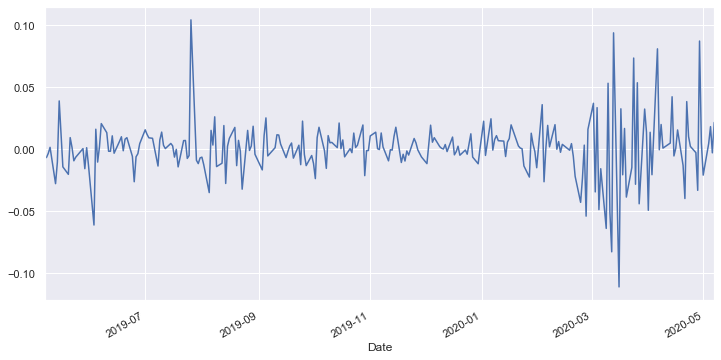

In [70]:
GOOG['Daily Return'].plot(grid=True, figsize=(12,6))

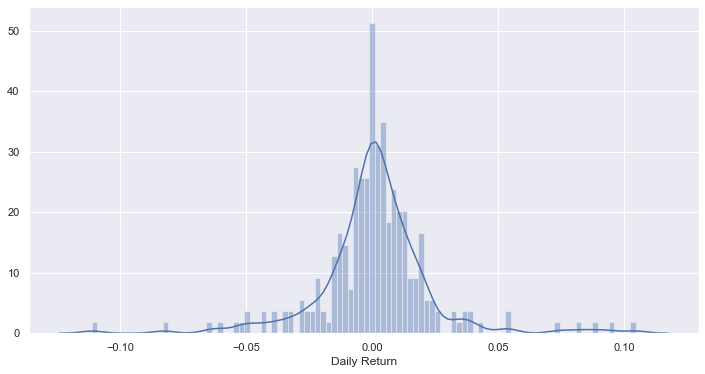

In [71]:
# Now the average daily return will be calculated and shown in graph below.
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.grid(True)
sns.distplot(GOOG['Daily Return'].dropna(),bins=100, ax=ax)

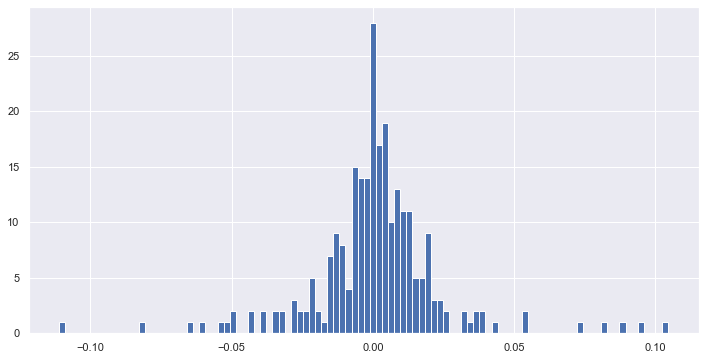

In [72]:
GOOG['Daily Return'].hist(bins=100, figsize=(12,6),)

Now We will analyze the closing values of stock for each company in the list.

In [73]:
#closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
each_closing=DataReader(comp_list,'yahoo',start,end)['Adj Close']
each_closing.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-07,200.239075,1921.000000,1174.099976,123.880966
2019-05-08,200.278534,1917.770020,1166.270020,123.871117
2019-05-09,198.126709,1899.869995,1162.380005,123.861244
2019-05-10,195.381973,1889.979980,1164.270020,125.469955
2019-05-13,184.026489,1822.680054,1132.030029,121.739311


Amazon has steady increase in stock values in April year 2020. As mostly people are ordering online because of the COVID-19 crisis. It could be a reason in stock value increase.

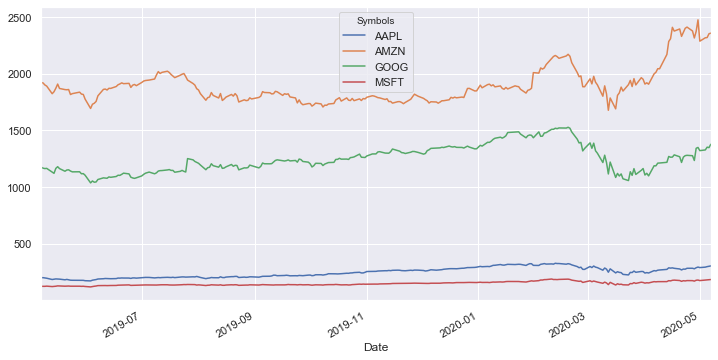

In [74]:
each_closing.plot(figsize=(12,6), grid=True)

In [75]:
each_daily_retrn= each_closing.pct_change()
each_daily_retrn.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-07,NaN,NaN,NaN,NaN
2019-05-08,0.000197,-0.001681,-0.006669,-0.000080
2019-05-09,-0.010744,-0.009334,-0.003335,-0.000080
2019-05-10,-0.013853,-0.005206,0.001626,0.012988
2019-05-13,-0.058119,-0.035609,-0.027691,-0.029733


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

In [76]:
#some details about seaborn grid
#https://seaborn.pydata.org/tutorial/aesthetics.html

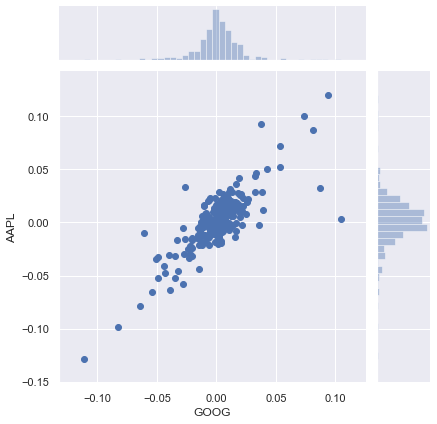

In [77]:
sns.jointplot('GOOG','AAPL',each_daily_retrn, kind='scatter')
sns.set()

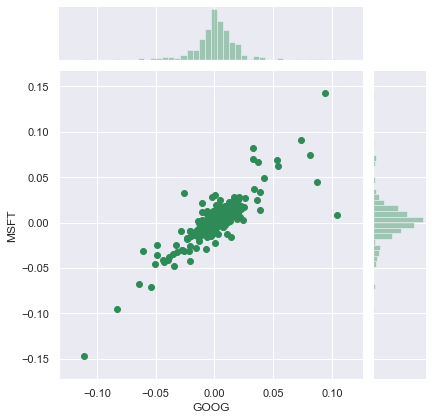

In [78]:
sns.set()
sns.jointplot('GOOG','MSFT',each_daily_retrn, kind='scatter', color='seagreen')

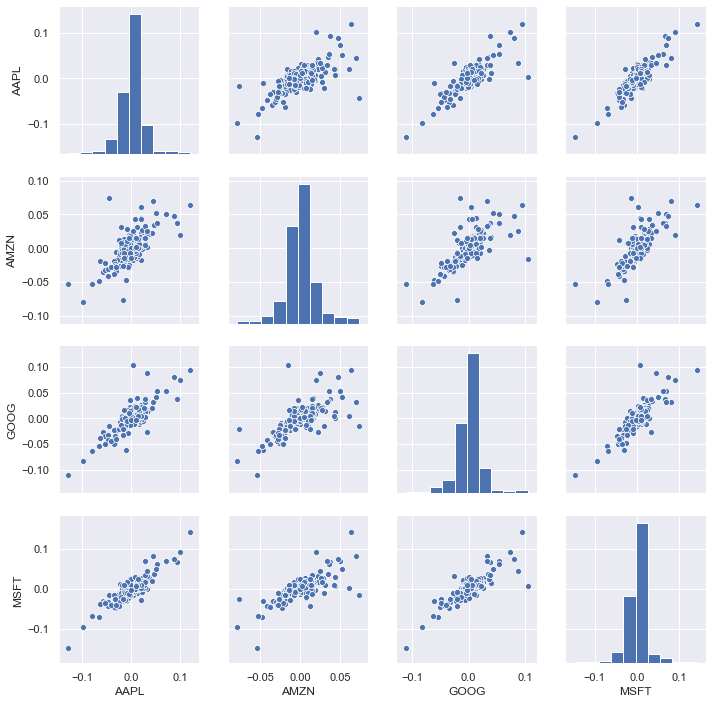

In [79]:
sns.pairplot(each_daily_retrn.dropna())

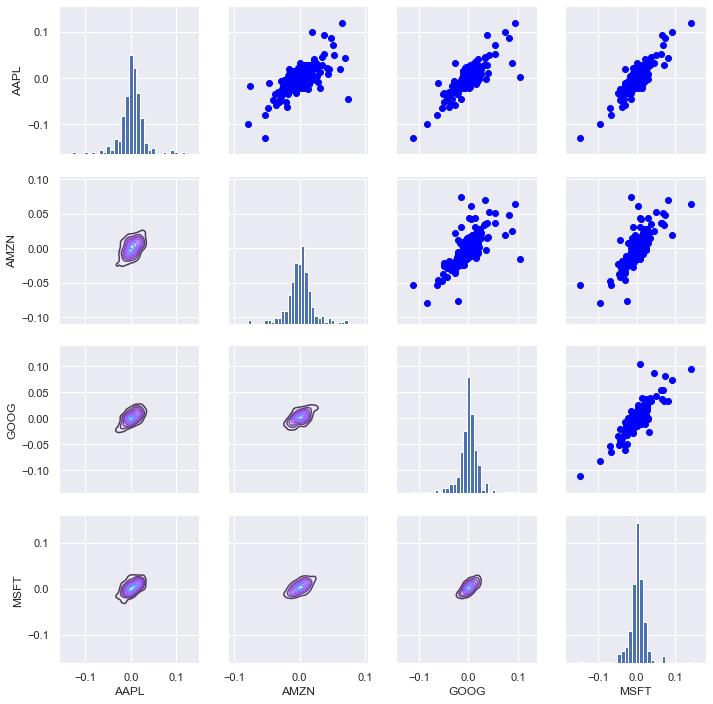

In [80]:
pearson_cor_analysis=sns.PairGrid(each_daily_retrn.dropna())
pearson_cor_analysis.map_upper(plt.scatter,color='blue')
pearson_cor_analysis.map_lower(sns.kdeplot,cmap='cool_d')
pearson_cor_analysis.map_diag(plt.hist,bins=30)

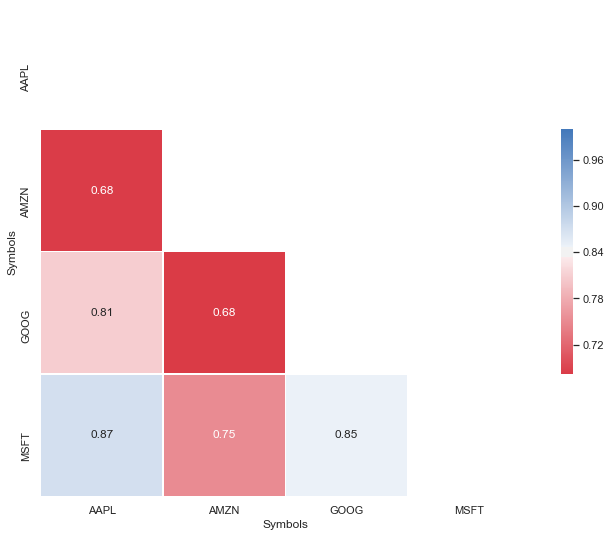

In [81]:

corr = each_daily_retrn.corr()

# Exclude duplicate correlations by masking uper right values
# np.zeros_like will give a arrays of zero lenght of the dataset.
mask = np.zeros_like(corr, dtype=np.bool)
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.triu_indices_from.html
#Return the indices for the upper-triangle of arr.
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)

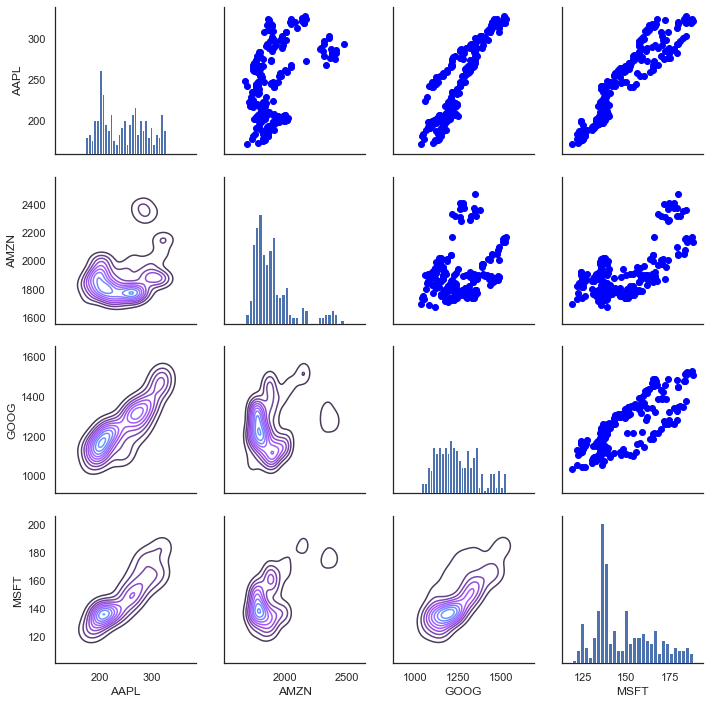

In [82]:
pearson_cor_analysis=sns.PairGrid(each_closing)
pearson_cor_analysis.map_upper(plt.scatter,color='blue')
pearson_cor_analysis.map_lower(sns.kdeplot,cmap='cool_d')
pearson_cor_analysis.map_diag(plt.hist,bins=30)

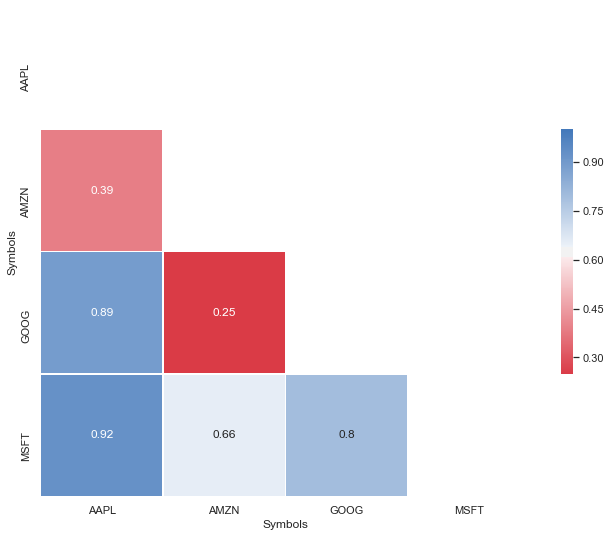

In [83]:
corr = each_closing.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)

### Risk Analysis

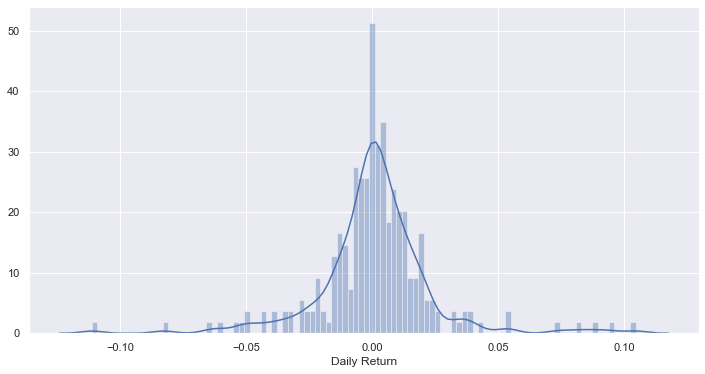

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.grid(True)
sns.distplot(GOOG['Daily Return'].dropna(),bins=100, ax=ax)

In [92]:
retrns['GOOG'].quantile(0.05)

-0.03457167691969172

In [94]:
retrns.quantile(0.05)

Symbols
AAPL   -0.034216
AMZN   -0.028111
GOOG   -0.034572
MSFT   -0.032821
Name: 0.05, dtype: float64

#### Value at risk using Monte Carlo Method

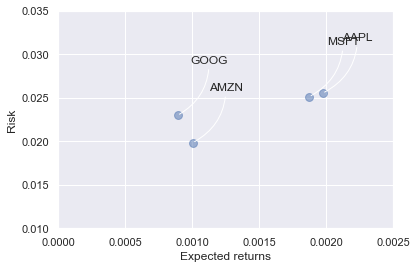

In [101]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = each_daily_retrn.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.035])
plt.xlim([-0.000,0.0025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [102]:

# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [107]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

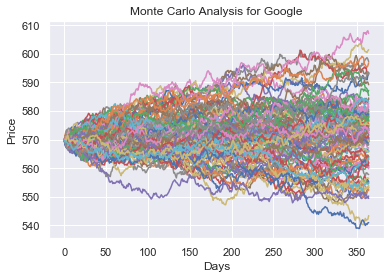

In [108]:
# Get start price from GOOG.head()
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [109]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

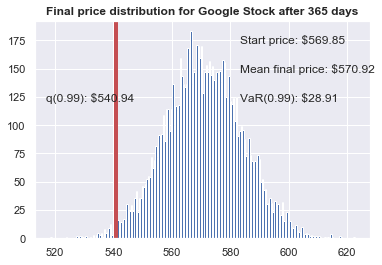

In [113]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');